In [1]:
import bert_model_train as bmt
import util as ut

from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import collections
import random
import pickle
import json
import time
import html
import copy
import csv
import os
import re
import networkx as nx


"""
save as pickle file
"""
def pickle_save(path, data):
    with open(path, 'wb') as file:
        pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)
    return 1

"""
load pickle data file
"""
def load_pickle(path_file):
    with open(path_file, 'rb') as file:
        data = pickle.load(file)
    return data

"""
load data from csv to dataframe
"""
def load_data_csv(path_file):
    t = {'user_id': str, 'status_id': str, 'tweet_id': str, 'is_retweet': bool,
         'reply_to_user_id': str, 'retweet_status_id': str, 'retweet_user_id': str}
    df = pd.read_csv(path_file, dtype=t)
    
    return df

"""
write on a csv file
"""
def create_csv_file(df, filename):    
    with open(filename, mode='w') as nf:
        writer_node = csv.writer(nf, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer_node.writerow(list(df.columns))
    
        for k, item in df.iterrows():
            writer_node.writerow(item)
            
    return 1

In [3]:
#print('-------- START influencers (proportion pageRank): --------')    
from_path = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/statistics/PageRank at 5%/dict_influencer_005.pickle'
dict_influencer, dict_stats = load_pickle(from_path)
dict_stats['otdirecto'] = dict_stats.pop('OTDirecto20E')


from_path = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/dict_influencer_005_NEW_KAV.pickle'
dict_influencer2, dict_stats2 = load_pickle(from_path)
dict_stats['kavanaugh'] = dict_stats2['kavanaugh']

def get_mean_by_frac(dict_stats, fraction):
    dict_prop_by_fraction = {}
    for topic in dict_stats.keys():

        pr_all = dict_stats[topic][2]
        sum_all_pr = sum(pr_all)

        for frac in fractions:
            q_max = np.quantile(pr_all, 1-(frac/100))

            temp_sum = sum([x for x in pr_all if(x>= q_max)])
            prop = round((temp_sum/sum_all_pr)*100, 2)

            if(frac not in dict_prop_by_fraction.keys()):
                dict_prop_by_fraction[frac] = []
            dict_prop_by_fraction[frac].append(prop)

    dict_mean_by_fraction = {k:round(sum(v)/len(v), 2) for k,v in dict_prop_by_fraction.items()}
    
    return dict_mean_by_fraction
    


def plot_mean_distrib_pr(dict_stats_by_fractions, markers='o'):
    fractions = dict_stats_by_fractions.keys()
    prop_by_quartile = [v for _,v in dict_stats_by_fractions.items()]

    df = pd.DataFrame({'fraction of top-user taken (%)': fractions,
                       'average PR_prop of topics (%)': prop_by_quartile})

    plot = sns.lineplot(data=df, x="fraction of top-user taken (%)", y="average PR_prop of topics (%)", marker=markers)
        
    #  Draw vertical line with values
    for frac in [5]:
        plot.axvline(frac, color='black', linestyle='--', clip_on=True)

    # Plot the graph
    plt.show()

    return 1



def plot_distrib_pr(dict_stats, fractions, topics, markers='o'):
    for topic in topics:
        pr_all = dict_stats[topic][2]

        sum_all_pr = sum(pr_all)

        prop_by_quartile = []
        for frac in fractions:
            q_max = np.quantile(pr_all, 1-(frac/100))

            temp_sum = sum([x for x in pr_all if(x>= q_max)])

            prop_by_quartile.append(round((temp_sum/sum_all_pr)*100, 2))

        df = pd.DataFrame({'fraction of top-user taken, by topic (%)': fractions,
                           'proportion PR explained (%)': prop_by_quartile})

        plot = sns.lineplot(data=df, x="fraction of top-user taken, by topic (%)", y="proportion PR explained (%)", label=topic) #, marker=markers)
        
    #  Draw vertical line with values
    for frac in [5]:
        plot.axvline(frac, color='black', linestyle='--', clip_on=True)
    
    plt.savefig('/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/influencer_LABEL/statistics/PageRank at 5%/proportion_sum_pagerank.png')
    # Plot the graph
    plt.show()
    
    return 1

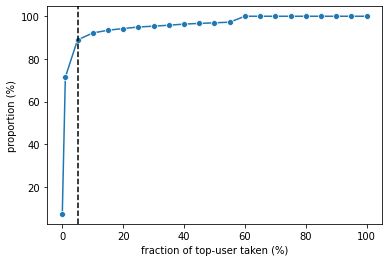

1

In [33]:
# PELOSI
fractions = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 1, 0]
plot_distrib_pr(dict_stats, fractions, ['pelosi'])

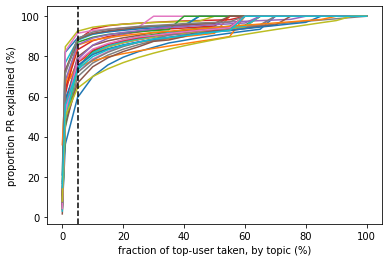

1

In [11]:
#ALL TOPICS
fractions = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 1, 0]
plot_distrib_pr(dict_stats, fractions, list(dict_stats.keys()), markers=None)

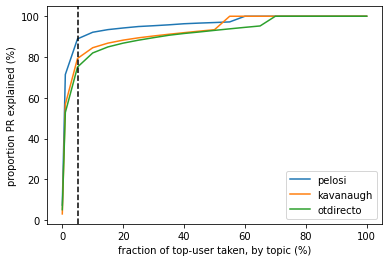

1

In [5]:
# PELOSI, KAVANAUGH, 1DIRECTION
fractions = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 1, 0]
plot_distrib_pr(dict_stats, fractions, ['pelosi', 'kavanaugh', 'otdirecto'])

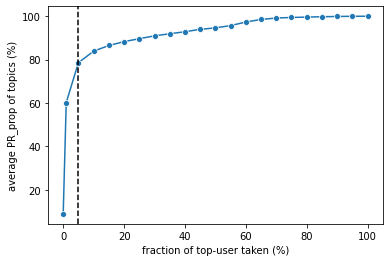

1

In [37]:
#MEAN ALL TOPICS
fractions = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 1, 0]
dict_mean_by_fraction = get_mean_by_frac(dict_stats, fractions)

plot_mean_distrib_pr(dict_mean_by_fraction)